# Cereal RFC

### Breakfast has long occupied the spot as the most important meal of the day.  Cereals, whether hot or cold are breakfast staples.  With so many cereal options, how does one choose?  Cereal ratings!  Cereal ratings are primarily based on nutritional value.  Calorie counts are one of the most important factors in determining the health value of a food.  Does calorie content affect cereal rating?  With the current emphasis on healthy living, the anticipated answer would be yes.  Low calorie cereals will have a higher rating than high calorie cereals.       

### To definitively answer this quesiton, an in depth analysis will be conducted.  A combination of 77 hot and cold cereals from 7 different manufacturers will be analyzed based on nutritional value.  The relationship between rating and calories will be explored.  

## Fields in the dataset:  

**Name:** Cereal name   

**Mfr:** Cereal manufacturer   
A = American Home Food Products  
G = General Mills  
K = Kelloggs  
N = Nabisco  
P = Post  
Q = Quaker Oats  
R = Ralston Purina  


**Type:**
C = Cold  
H = Hot  

**Calories:** calories per serving  
**Protein:** grams of protein per serving  
**Fat:** grams of fat per serving   
**Sodium:** milligrams of sodium per serving  
**Fiber:** grams of dietary fiber per serving   
**Carbo:** grams of complex carbohydrates per serving  
**Sugars:** grams of sugar per serving  
**Potass:** milligrams of potassium per serving   
**Vitamins:** vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended  

**Shelf:** display shelf (1, 2, or 3, counting from the floor)  
**Weight:** weight in ounces of one serving  
**Cups:** number of cups in one serving  

**Rating:** a rating of the cereals (Possibly from Consumer Reports?)

### Acknowledgements  

These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The original source can be found [here](https://perso.telecom-paristech.fr/eagan/class/igr204/datasets).    

This dataset was downloaded from [kaggle](https://www.kaggle.com/crawford/80-cereals/data).  

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [79]:
cereal = pd.read_csv('cereal.csv')

In [80]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [81]:
cereal.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [82]:
# How many cereals are on each shelf?

print('# of cereals on shelf 1:', len(cereal[cereal.shelf == 1]))
print('# of cereals on shelf 2:', len(cereal[cereal.shelf == 2]))
print('# of cereals on shelf 3:', len(cereal[cereal.shelf == 3]))
#print('test proportion:', cereal.shelf.mean())
print()

# of cereals on shelf 1: 20
# of cereals on shelf 2: 21
# of cereals on shelf 3: 36



In [83]:
cereal.calories.describe()

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64

In [84]:
cereal.groupby('mfr').calories.describe()

,count,mean,std,min,25%,50%,75%,max
mfr,,,,,,,,
A,1.0,100.000000,NaN,100.0,100.0,100.0,100.0,100.0
G,22.0,111.363636,10.371873,100.0,110.0,110.0,110.0,140.0
K,23.0,108.695652,22.218818,50.0,100.0,110.0,115.0,160.0
N,6.0,86.666667,10.327956,70.0,82.5,90.0,90.0,100.0
P,9.0,108.888889,10.540926,90.0,100.0,110.0,120.0,120.0
Q,8.0,95.000000,29.277002,50.0,87.5,100.0,120.0,120.0
R,8.0,115.000000,22.677868,90.0,100.0,110.0,120.0,150.0


In [85]:
# total calories for all cereals by mfr

cereal.groupby('mfr').calories.sum()

mfr
A     100
G    2450
K    2500
N     520
P     980
Q     760
R     920
Name: calories, dtype: int64

In [86]:
cereal.rating.describe()

count    77.000000
mean     42.665705
std      14.047289
min      18.042851
25%      33.174094
50%      40.400208
75%      50.828392
max      93.704912
Name: rating, dtype: float64

In [87]:
cereal.groupby('mfr').rating.describe()

,count,mean,std,min,25%,50%,75%,max
mfr,,,,,,,,
A,1.0,54.850917,NaN,54.850917,54.850917,54.850917,54.850917,54.850917
G,22.0,34.485852,8.946704,19.823573,27.963172,36.181877,39.587829,51.592193
K,23.0,44.038462,14.457434,29.924285,34.478442,40.560159,50.013484,93.704912
N,6.0,67.968567,5.509326,59.363993,65.459333,68.319429,71.702084,74.472949
P,9.0,41.705744,10.047647,28.025765,35.252444,40.917047,52.076897,53.371007
Q,8.0,42.915990,16.797673,18.042851,30.955582,47.419974,53.310322,63.005645
R,8.0,41.542997,6.080841,34.139765,36.448858,41.721976,45.528205,49.787445


### An overview of cereal rating by shelf.  Shelf 2 has the lowest rating, and likely the highest caloric content by shelf.

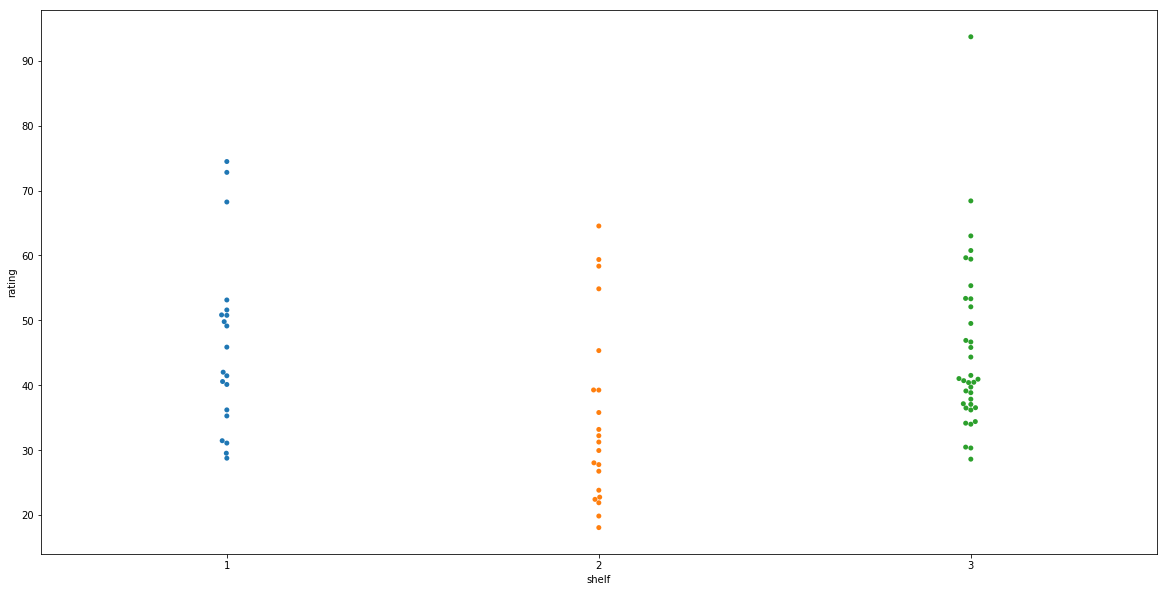

In [88]:
sns.swarmplot(x='shelf', y='rating', data=cereal)
plt.show();

### Although it appears that shelf 3 has the highest calorie count by shelf, it is noted that shelf 3 has 1.5x the number of cereals as shelves 1 and 2.

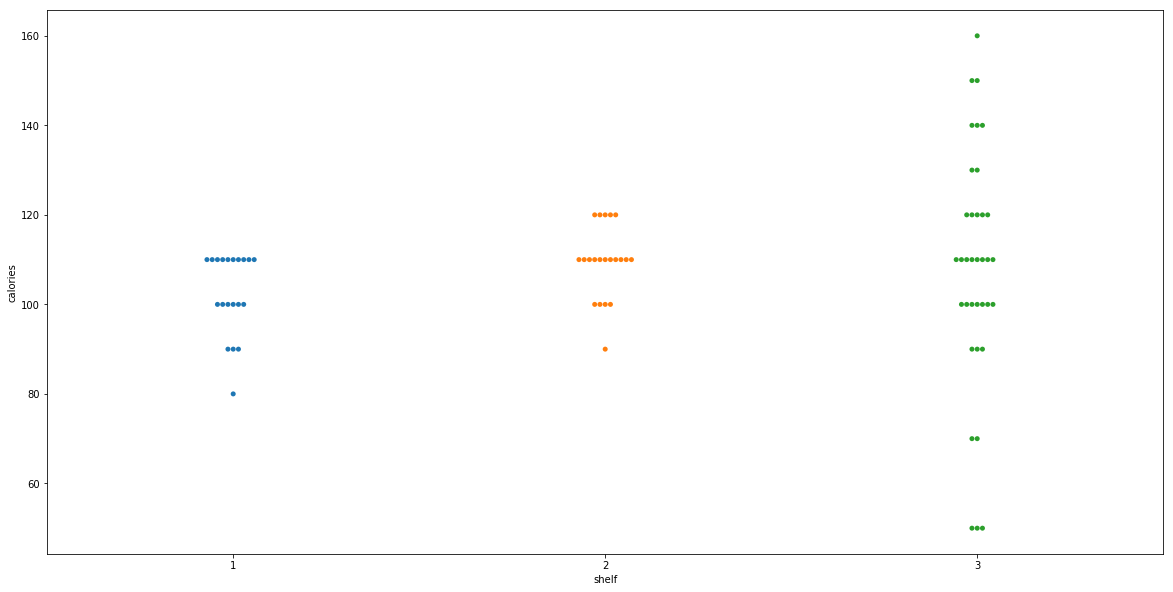

In [89]:
sns.swarmplot(x='shelf', y='calories', data=cereal)
plt.show();

In [90]:
# separate df into high & low calorie groups based on 50th percentile for easier plotting & visualization

cereal['calorie_count'] = np.where(cereal['calories']>= 110, 1, 0)

In [91]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,calorie_count
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,1
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,1


### In separating high calorie cereals from low calorie cereals and plotting the difference, it is evident that low calorie cereals have a higher rating than high calorie cereals.

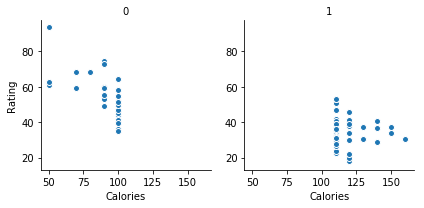

In [92]:
g = sns.FacetGrid(cereal, col='calorie_count')
g = (g.map(plt.scatter, 'calories', 'rating', edgecolor='w')
     .set_axis_labels('Calories', 'Rating')
     .set_titles('{col_name}'))

# name each plot separately??

### Based on the swarm and box plots below, cereals with a lower caloric content do appear to be rated higher.  It is clearly visible in both plots that the rating decreases as caloric value increases.  

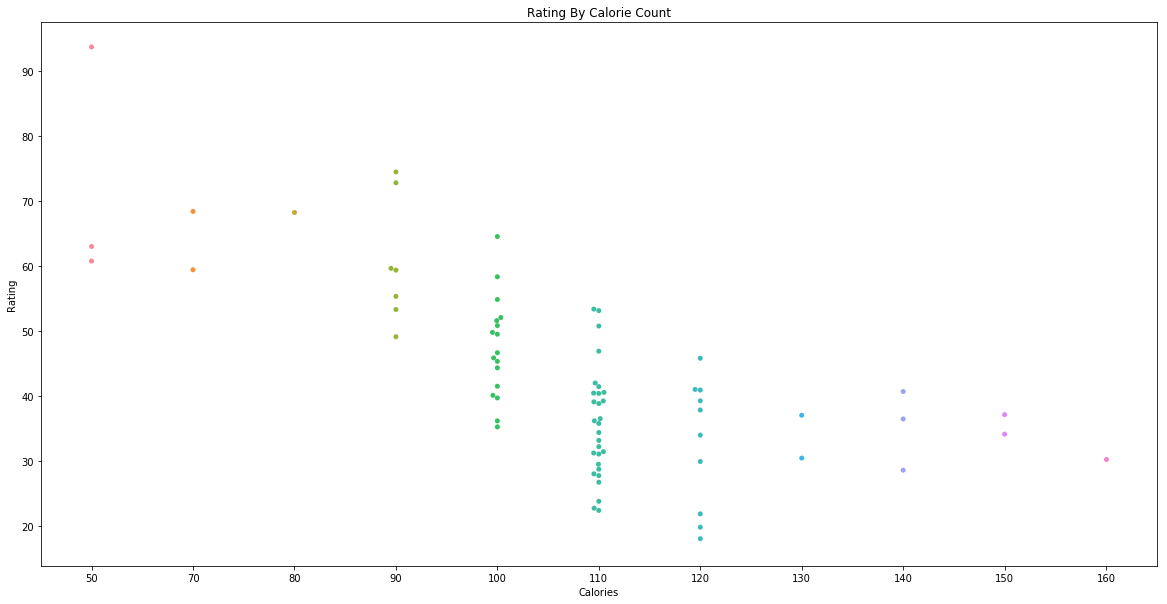

In [93]:
sns.swarmplot(x='calories', y='rating', data=cereal)
plt.title('Rating By Calorie Count')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show();

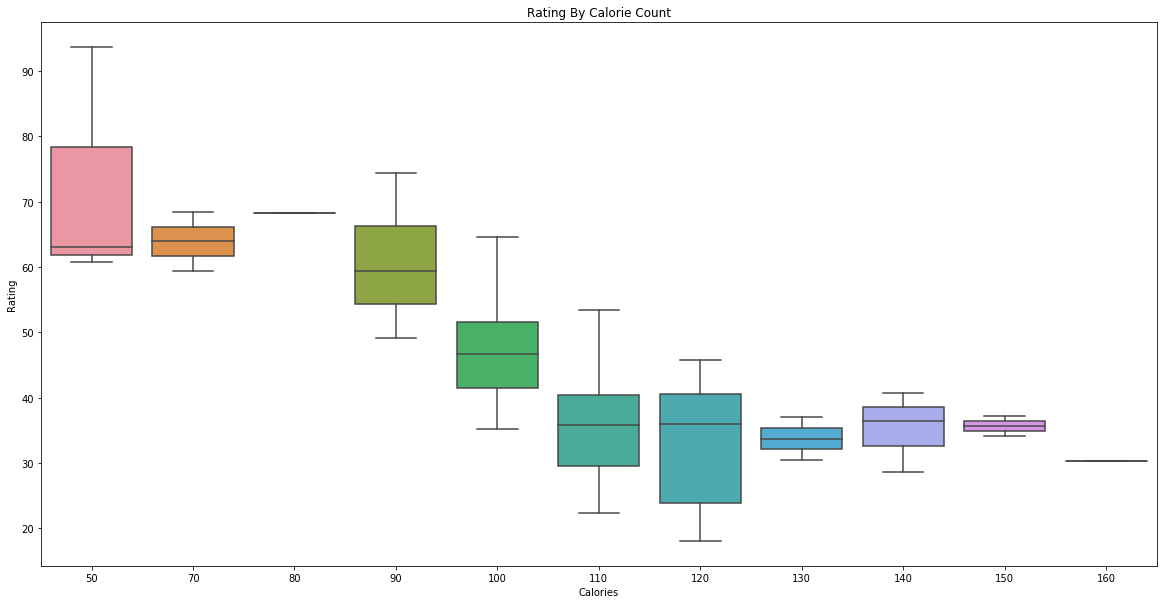

In [94]:
sns.boxplot(x='calories', y='rating', data=cereal)
plt.title('Rating By Calorie Count')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show();

### Performing a t-test to determine if there is numerical significance by rating based on shelf placement.  

In [95]:
stats.ttest_ind(cereal[cereal.shelf == 1].rating,
                cereal[cereal.shelf == 2].rating)

Ttest_indResult(statistic=2.5983494848572248, pvalue=0.013152099361155386)

In [96]:
stats.ttest_ind(cereal[cereal.shelf == 2].rating,
                cereal[cereal.shelf == 3].rating)

Ttest_indResult(statistic=-2.7980188868196167, pvalue=0.0070742515639281725)

In [97]:
stats.ttest_ind(cereal[cereal.shelf == 1].rating,
                cereal[cereal.shelf == 3].rating)

Ttest_indResult(statistic=0.25172424711155639, pvalue=0.80220977177907182)

### Based on the p-values for shelf placement by rating, the differences between shelves 1 & 2 and shelves 2 & 3 are not random and should be investigated further. There is no statistical significance between shelves 1 and 3.    

### Performing a t-test to determine if there is numerical significance for calorie count based on shelf placement.  

In [98]:
stats.ttest_ind(cereal[cereal.shelf == 1].calories,
                cereal[cereal.shelf == 2].calories)

Ttest_indResult(statistic=-2.6204675360969265, pvalue=0.012450292993749177)

In [99]:
stats.ttest_ind(cereal[cereal.shelf == 2].calories,
                cereal[cereal.shelf == 3].calories)

Ttest_indResult(statistic=0.28850899893327309, pvalue=0.77404169820333735)

In [100]:
stats.ttest_ind(cereal[cereal.shelf == 1].calories,
                cereal[cereal.shelf == 3].calories)

Ttest_indResult(statistic=-0.84637080476869908, pvalue=0.40108112148234076)

### Based on the p-values for shelf placement by calorie count, the differences between shelves 1 & 2 are not random and should be investigated further. There is no statistical significance between shelves 1 and 3 or shelves 2 & 3.   

### Performing a t-test to determine if there is numerical significance for high and low calorie counts when separated based on shelf placement.  

In [101]:
stats.ttest_ind(cereal[cereal.shelf == 1].calorie_count,
                cereal[cereal.shelf == 2].calorie_count)

Ttest_indResult(statistic=-1.763730390743635, pvalue=0.085610515670198728)

In [102]:
stats.ttest_ind(cereal[cereal.shelf == 2].calorie_count,
                cereal[cereal.shelf == 3].calorie_count)

Ttest_indResult(statistic=1.3609124930241632, pvalue=0.17909188487352104)

In [103]:
stats.ttest_ind(cereal[cereal.shelf == 1].calorie_count,
                cereal[cereal.shelf == 3].calorie_count)

Ttest_indResult(statistic=-0.59215652546379227, pvalue=0.55621717810106897)

### When calorie count is separated into high and low based on the 50th percentile, there is no statistical significance between any of the shelves.  This result warrants further analysis to confirm or disprove if this is an effect of Simpson's Paradox.

### In conclusion, nurtitional value plays a direct role in the health rating of a cereal.  The difference between calories and rating is significant and as expected, caloric value directly affects rating.  Further study is warranted and the having historical rating data for comparison would provide greater context and an understanding of how health and food comsumption have changed over time.